In [103]:
import pandas as pd
df=pd.read_csv('/kaggle/input/indian-medicine-data/medicine_data.csv')

In [104]:
df.head()

,sub_category,product_name,salt_composition,product_price,product_manufactured,medicine_desc,side_effects,drug_interactions
0,Human Insulin Basal,Human Insulatard 40IU/ml Suspension for Injection,Insulin Isophane (40IU),₹133.93,Novo Nordisk India Pvt Ltd,Human Insulatard 40IU/ml Suspension for Inject...,"Hypoglycemia (low blood glucose level),Injecti...","{""drug"": [""Benazepril"", ""Captopril"", ""Enalapri..."
1,Human Insulin Basal,Insulin 40IU/ml Injection,Insulin Isophane (40IU),₹121.91,Sun Pharmaceutical Industries Ltd,Insulin 40IU/ml Injection is used to improve b...,"Hypoglycemia (low blood glucose level),Injecti...","{""drug"": [""Benazepril"", ""Captopril"", ""Enalapri..."
2,Human Insulin Basal,Huminsulin N 40IU/ml Injection,Insulin Isophane (40IU),₹133.45,Eli Lilly and Company India Pvt Ltd,Huminsulin N 40IU/ml Injection is used to impr...,"Hypoglycemia (low blood glucose level),Injecti...","{""drug"": [""Benazepril"", ""Captopril"", ""Enalapri..."
3,Human Insulin Basal,Insugen-N 40IU/ml Injection,Insulin Isophane (40IU),₹133.36,Biocon,Insugen-N 40IU/ml Injection is used to improve...,"Hypoglycemia (low blood glucose level),Injecti...","{""drug"": [""Benazepril"", ""Captopril"", ""Enalapri..."
4,Human Insulin Basal,Insulatard 100IU/ml Flexpen,Insulin Isophane (100IU/ml),₹401.03,Novo Nordisk India Pvt Ltd,Insulatard 100IU/ml Flexpen is used to improve...,"Hypoglycemia (low blood glucose level),Injecti...","{""drug"": [""Benazepril"", ""Captopril"", ""Enalapri..."


In [105]:
len(df['sub_category'].unique())

252

In [106]:
len(df['product_name'].unique())

7469

In [107]:
len(df['salt_composition'].unique())

2663

I think we should use name as primary value instead of salt, to make visualizton for different aspects like cost

In [108]:
df.columns

Index(['sub_category', 'product_name', 'salt_composition', 'product_price',
       'product_manufactured', 'medicine_desc', 'side_effects',
       'drug_interactions'],
      dtype='object')

In [109]:
df['drug_interactions'][0]

'{"drug": ["Benazepril", "Captopril", "Enalapril", "Fosinopril"], "brand": [" Apriace", " Capotril, Aceten, Angiopril", " Enatol, AB-Pril, Inopril", " Fovas"], "effect": ["MODERATE", "MODERATE", "MODERATE", "MODERATE"]}'

In [110]:
df['medicine_desc'][0]

"Human Insulatard 40IU/ml Suspension for Injection is used to improve blood sugar control in adults and children with type 1 and type 2 diabetes mellitus. It is an intermediate-acting type of insulin that helps to lower blood sugar levels and reduce the chances of developing serious complications of diabetes.Human Insulatard 40IU/ml Suspension for Injection is often prescribed along with short-acting insulin or other oral diabetes medicines. Your doctor or nurse will teach you the correct way of injecting it under the skin. Don’t stop taking it unless your doctor tells you to. It is only part of a treatment program that should also include a healthy diet, regular exercise, and weight reduction as advised by your doctor.Check your blood sugar levels regularly, keep track of your results and share them with your doctor. This is very important to work out the correct dose of the medicine for you.The most common side effect of this medicine is low blood sugar levels (hypoglycemia). To prev

In [111]:
df['side_effects'][0]

'Hypoglycemia (low blood glucose level),Injection site allergic reaction,Lipodystrophy (skin thickening or pits at the injection site),Weight gain,Edema (swelling)'

In [112]:
# Step 1: Identify rows with duplicate values in 'product_name'
duplicates = df[df.duplicated('product_name', keep=False)]

# Step 2: Sort the DataFrame by 'product_name' to group duplicates together
duplicates_sorted = duplicates.sort_values(by='product_name')

# Step 3: Print the first two rows
duplicates_sorted.head(5)

,sub_category,product_name,salt_composition,product_price,product_manufactured,medicine_desc,side_effects,drug_interactions
182805,Systemic Antihistamines,1-AL Tablet,Levocetirizine (5mg),₹24.48,FDC Ltd,1-AL Tablet belongs to a group of medicines ca...,"Sleepiness,Fatigue,Headache,Dryness in mouth","{""drug"": [""Aprepitant"", ""Fosaprepitant"", ""Zafi..."
184038,Systemic Antihistamines,1-AL Tablet,Levocetirizine (5mg),₹24.48,FDC Ltd,1-AL Tablet belongs to a group of medicines ca...,"Sleepiness,Fatigue,Headache,Dryness in mouth","{""drug"": [""Aprepitant"", ""Fosaprepitant"", ""Zafi..."
187834,Systemic Antihistamines,1-AL Tablet,Levocetirizine (5mg),₹24.48,FDC Ltd,1-AL Tablet belongs to a group of medicines ca...,"Sleepiness,Fatigue,Headache,Dryness in mouth","{""drug"": [""Aprepitant"", ""Fosaprepitant"", ""Zafi..."
181453,Systemic Antihistamines,1-AL Tablet,Levocetirizine (5mg),₹24.48,FDC Ltd,1-AL Tablet belongs to a group of medicines ca...,"Sleepiness,Fatigue,Headache,Dryness in mouth","{""drug"": [""Aprepitant"", ""Fosaprepitant"", ""Zafi..."
183320,Systemic Antihistamines,1-AL Tablet,Levocetirizine (5mg),₹24.48,FDC Ltd,1-AL Tablet belongs to a group of medicines ca...,"Sleepiness,Fatigue,Headache,Dryness in mouth","{""drug"": [""Aprepitant"", ""Fosaprepitant"", ""Zafi..."


In [113]:
# Count the number of duplicate rows
num_duplicates = df.duplicated().sum()

print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 187960


In [114]:
# Drop duplicate rows
df_no_duplicates = df.drop_duplicates()
df_no_duplicates.shape

(7645, 8)

In [115]:
# Drop rows with duplicate 'product_name' (keep the first occurrence)
df_no_duplicates = df.drop_duplicates(subset=['product_name'], keep='first')

In [116]:
grouped = df_no_duplicates.groupby('salt_composition')
# Access the group where 'salt_composition' is 'Levocetirizine (5mg)'
group_x = grouped.get_group('Levocetirizine (5mg)')
group_x

,sub_category,product_name,salt_composition,product_price,product_manufactured,medicine_desc,side_effects,drug_interactions
181109,Systemic Antihistamines,Levocet Tablet,Levocetirizine (5mg),₹39.95,Hetero Healthcare Limited,Levocet Tablet belongs to a group of medicines...,"Sleepiness,Fatigue,Headache,Dryness in mouth","{""drug"": [""Aprepitant"", ""Fosaprepitant"", ""Zafi..."
181118,Systemic Antihistamines,Teczine Tablet,Levocetirizine (5mg),₹68.42,Sun Pharmaceutical Industries Ltd,Teczine Tablet belongs to a group of medicines...,"Sleepiness,Fatigue,Headache,Dryness in mouth","{""drug"": [""Aprepitant"", ""Fosaprepitant"", ""Zafi..."
181126,Systemic Antihistamines,Lecope Tablet,Levocetirizine (5mg),₹20.98,Mankind Pharma Ltd,Lecope Tablet belongs to a group of medicines ...,"Sleepiness,Fatigue,Headache,Dryness in mouth","{""drug"": [""Aprepitant"", ""Fosaprepitant"", ""Zafi..."
181135,Systemic Antihistamines,Levosiz Tablet,Levocetirizine (5mg),₹12.32,Systopic Laboratories Pvt Ltd,Levosiz Tablet belongs to a group of medicines...,"Sleepiness,Fatigue,Headache,Dryness in mouth","{""drug"": [""Aprepitant"", ""Fosaprepitant"", ""Zafi..."
181137,Systemic Antihistamines,1-AL Tablet,Levocetirizine (5mg),₹24.48,FDC Ltd,1-AL Tablet belongs to a group of medicines ca...,"Sleepiness,Fatigue,Headache,Dryness in mouth","{""drug"": [""Aprepitant"", ""Fosaprepitant"", ""Zafi..."
181140,Systemic Antihistamines,LCZ Tablet,Levocetirizine (5mg),₹20.32,Rapross Pharmaceuticals Pvt Ltd,LCZ Tablet belongs to a group of medicines cal...,"Sleepiness,Fatigue,Headache,Dryness in mouth","{""drug"": [""Aprepitant"", ""Fosaprepitant"", ""Zafi..."


In [117]:
# Temporarily disable truncation for this print statement
with pd.option_context('display.max_colwidth', None):
    print(group_x['medicine_desc'][0:2])

181109    Levocet Tablet belongs to a group of medicines called antihistamines. It is used to treat various allergic conditions such as hay fever, conjunctivitis, some skin reactions such as eczema, hives, and reactions to bites and stings. It also relieves watery eyes, runny nose, sneezing, and itching.Levocet Tablet can be taken with or without food. The dose required by you may vary depending on what you are taking it for. This medicine is usually taken in the evening, but follow the advice of your doctor on how to take it. You may need this medicine only on days you have symptoms, but if you are taking it to prevent the symptoms then you should take it regularly. If you miss doses or stop taking it earlier than advised, your symptoms may come back.This medicine is generally very safe. The most common side effects include feeling sleepy or dizzy, dry mouth, fatigue, and headache. These are usually mild and go away after a couple of days as your body adjusts to it. Consult your docto

In [118]:
group_x = grouped.get_group('Insulin Isophane (40IU)')
group_x

,sub_category,product_name,salt_composition,product_price,product_manufactured,medicine_desc,side_effects,drug_interactions
0,Human Insulin Basal,Human Insulatard 40IU/ml Suspension for Injection,Insulin Isophane (40IU),₹133.93,Novo Nordisk India Pvt Ltd,Human Insulatard 40IU/ml Suspension for Inject...,"Hypoglycemia (low blood glucose level),Injecti...","{""drug"": [""Benazepril"", ""Captopril"", ""Enalapri..."
1,Human Insulin Basal,Insulin 40IU/ml Injection,Insulin Isophane (40IU),₹121.91,Sun Pharmaceutical Industries Ltd,Insulin 40IU/ml Injection is used to improve b...,"Hypoglycemia (low blood glucose level),Injecti...","{""drug"": [""Benazepril"", ""Captopril"", ""Enalapri..."
2,Human Insulin Basal,Huminsulin N 40IU/ml Injection,Insulin Isophane (40IU),₹133.45,Eli Lilly and Company India Pvt Ltd,Huminsulin N 40IU/ml Injection is used to impr...,"Hypoglycemia (low blood glucose level),Injecti...","{""drug"": [""Benazepril"", ""Captopril"", ""Enalapri..."
3,Human Insulin Basal,Insugen-N 40IU/ml Injection,Insulin Isophane (40IU),₹133.36,Biocon,Insugen-N 40IU/ml Injection is used to improve...,"Hypoglycemia (low blood glucose level),Injecti...","{""drug"": [""Benazepril"", ""Captopril"", ""Enalapri..."
8,Human Insulin Basal,Lupisulin N 40IU/ml Injection,Insulin Isophane (40IU),₹133.53,Lupin Ltd,Lupisulin N 40IU/ml Injection is used to impro...,"Hypoglycemia (low blood glucose level),Injecti...","{""drug"": [""Benazepril"", ""Captopril"", ""Enalapri..."
12,Human Insulin Basal,Insuman Basal 40IU/ml Injection,Insulin Isophane (40IU),₹119.06,Sanofi India Ltd,Insuman Basal 40IU/ml Injection is used to imp...,"Hypoglycemia (low blood glucose level),Injecti...","{""drug"": [""Benazepril"", ""Captopril"", ""Enalapri..."
13,Human Insulin Basal,Wosulin-N 40IU/ml Suspension for Injection,Insulin Isophane (40IU),₹131.47,Wockhardt Ltd,Wosulin-N 40IU/ml Suspension for Injection is ...,"Hypoglycemia (low blood glucose level),Injecti...","{""drug"": [""Benazepril"", ""Captopril"", ""Enalapri..."
15,Human Insulin Basal,Iletin NPH 40IU/ml Injection,Insulin Isophane (40IU),₹76.93,Eli Lilly and Company India Pvt Ltd,Iletin NPH 40IU/ml Injection is used to improv...,"Hypoglycemia (low blood glucose level),Injecti...","{""drug"": [""Benazepril"", ""Captopril"", ""Enalapri..."
18,Human Insulin Basal,Lentard 40IU/ml Injection,Insulin Isophane (40IU),₹109.85,Novo Nordisk India Pvt Ltd,Lentard 40IU/ml Injection is used to improve b...,"Hypoglycemia (low blood glucose level),Injecti...","{""drug"": [""Benazepril"", ""Captopril"", ""Enalapri..."
19,Human Insulin Basal,Insulatard SC 40IU Injection,Insulin Isophane (40IU),NaN,Novo Nordisk India Pvt Ltd,Insulatard SC 40IU Injection is used to improv...,"Hypoglycemia (low blood glucose level),Injecti...","{""drug"": [""Benazepril"", ""Captopril"", ""Enalapri..."


In [119]:
# Temporarily disable truncation for this print statement
with pd.option_context('display.max_colwidth', None):
    print(group_x['medicine_desc'][0:4])

0    Human Insulatard 40IU/ml Suspension for Injection is used to improve blood sugar control in adults and children with type 1 and type 2 diabetes mellitus. It is an intermediate-acting type of insulin that helps to lower blood sugar levels and reduce the chances of developing serious complications of diabetes.Human Insulatard 40IU/ml Suspension for Injection is often prescribed along with short-acting insulin or other oral diabetes medicines. Your doctor or nurse will teach you the correct way of injecting it under the skin. Don’t stop taking it unless your doctor tells you to. It is only part of a treatment program that should also include a healthy diet, regular exercise, and weight reduction as advised by your doctor.Check your blood sugar levels regularly, keep track of your results and share them with your doctor. This is very important to work out the correct dose of the medicine for you.The most common side effect of this medicine is low blood sugar levels (hypoglycemia). To 

**Each salt has same desc**

In [120]:
# Temporarily disable truncation for this print statement
with pd.option_context('display.max_colwidth', None):
    print(group_x['side_effects'])

0     Hypoglycemia (low blood glucose level),Injection site allergic reaction,Lipodystrophy (skin thickening or pits at the injection site),Weight gain,Edema (swelling)
1     Hypoglycemia (low blood glucose level),Injection site allergic reaction,Lipodystrophy (skin thickening or pits at the injection site),Weight gain,Edema (swelling)
2     Hypoglycemia (low blood glucose level),Injection site allergic reaction,Lipodystrophy (skin thickening or pits at the injection site),Weight gain,Edema (swelling)
3     Hypoglycemia (low blood glucose level),Injection site allergic reaction,Lipodystrophy (skin thickening or pits at the injection site),Weight gain,Edema (swelling)
8     Hypoglycemia (low blood glucose level),Injection site allergic reaction,Lipodystrophy (skin thickening or pits at the injection site),Weight gain,Edema (swelling)
12    Hypoglycemia (low blood glucose level),Injection site allergic reaction,Lipodystrophy (skin thickening or pits at the injection site),Weight gain,Ede

**Each salt has same side effects**

In [121]:
# Temporarily disable truncation for this print statement
with pd.option_context('display.max_colwidth', None):
    print(group_x['drug_interactions'])

0     {"drug": ["Benazepril", "Captopril", "Enalapril", "Fosinopril"], "brand": [" Apriace", " Capotril, Aceten, Angiopril", " Enatol, AB-Pril, Inopril", " Fovas"], "effect": ["MODERATE", "MODERATE", "MODERATE", "MODERATE"]}
1     {"drug": ["Benazepril", "Captopril", "Enalapril", "Fosinopril"], "brand": [" Apriace", " Capotril, Aceten, Angiopril", " Enatol, AB-Pril, Inopril", " Fovas"], "effect": ["MODERATE", "MODERATE", "MODERATE", "MODERATE"]}
2     {"drug": ["Benazepril", "Captopril", "Enalapril", "Fosinopril"], "brand": [" Apriace", " Capotril, Aceten, Angiopril", " Enatol, AB-Pril, Inopril", " Fovas"], "effect": ["MODERATE", "MODERATE", "MODERATE", "MODERATE"]}
3     {"drug": ["Benazepril", "Captopril", "Enalapril", "Fosinopril"], "brand": [" Apriace", " Capotril, Aceten, Angiopril", " Enatol, AB-Pril, Inopril", " Fovas"], "effect": ["MODERATE", "MODERATE", "MODERATE", "MODERATE"]}
8     {"drug": ["Benazepril", "Captopril", "Enalapril", "Fosinopril"], "brand": [" Apriace", " Capot

**Each salt has same drug interactions**

Different drugs that have same salt, have different prices.

**Each salt has same desc, side effects and drug interactions**

# Embedding

In [122]:
# Remove ₹ symbol from the 'Price' column
df_no_duplicates['product_price'] = df_no_duplicates['product_price'].str.replace('₹', '', regex=False)

# Optional: Convert 'Price' column to numeric
df_no_duplicates['product_price'] = pd.to_numeric(df_no_duplicates['product_price'])

<ipython-input-122-108f8ffb1d41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['product_price'] = df_no_duplicates['product_price'].str.replace('₹', '', regex=False)
<ipython-input-122-108f8ffb1d41>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['product_price'] = pd.to_numeric(df_no_duplicates['product_price'])


In [123]:
df_no_duplicates['product_price']

0         133.93
1         121.91
2         133.45
3         133.36
4         401.03
           ...  
195599      9.77
195600     85.00
195601      4.25
195602     25.50
195604     13.51
Name: product_price, Length: 7469, dtype: float64

In [124]:
df_no_duplicates['product_price'].describe()

count      6037.000000
mean        916.003151
std        5548.424484
min           1.060000
25%          57.890000
50%         124.350000
75%         303.300000
max      236500.000000
Name: product_price, dtype: float64

In [125]:
df_no_duplicates['product_price'].isna().sum()

1432

In [126]:
global_median = df_no_duplicates['product_price'].median()

df_no_duplicates['product_price'] = df_no_duplicates['product_price'].fillna(
    df_no_duplicates.groupby('salt_composition')['product_price'].transform('median')
).fillna(global_median) # if salt group dont have median price

<ipython-input-126-bf8e7ed40041>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['product_price'] = df_no_duplicates['product_price'].fillna(


In [127]:
df_no_duplicates['product_price'].isna().sum()

0

In [128]:
df_no_duplicates['product_price'].describe()

count      7469.000000
mean        804.710929
std        5024.725803
min           1.060000
25%          66.040000
50%         124.350000
75%         252.620000
max      236500.000000
Name: product_price, dtype: float64

In [129]:
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

# Step 1: Embed text columns using SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
medicine_desc_emb = model.encode(df_no_duplicates["medicine_desc"].tolist())
side_effects_emb = model.encode(df_no_duplicates["side_effects"].tolist())
drug_interactions_emb = model.encode(df_no_duplicates["drug_interactions"].tolist())

# Step 2: One-hot encode categorical columns
one_hot = OneHotEncoder()
salt_composition_emb = one_hot.fit_transform(df_no_duplicates[["salt_composition"]]).toarray()
product_manufactured_emb = one_hot.fit_transform(df_no_duplicates[["product_manufactured"]]).toarray()

Batches:   0%|          | 0/234 [00:00<?, ?it/s]

Batches:   0%|          | 0/234 [00:00<?, ?it/s]

Batches:   0%|          | 0/234 [00:00<?, ?it/s]

In [130]:
# Step 3: Normalize numerical column
product_price_norm = (df_no_duplicates["product_price"] - df_no_duplicates["product_price"].mean()) / df_no_duplicates["product_price"].std()

# Step 4: Combine all embeddings
combined_embeddings = np.hstack([medicine_desc_emb, side_effects_emb, drug_interactions_emb,
                                 salt_composition_emb, product_manufactured_emb, product_price_norm.values.reshape(-1, 1)])

In [131]:
!pip install umap-learn

In [132]:
import umap
reducer = umap.UMAP(n_components=100)  # Reduce to 50 dimensions
reduced_embeddings = reducer.fit_transform(combined_embeddings)

print(reduced_embeddings.shape)  # Check the shape of the reduced embeddings

(7469, 100)


In [133]:
# Step 6: Create a DataFrame for reduced embeddings
reduced_embeddings_df = pd.DataFrame(reduced_embeddings, columns=[f"embedding_{i+1}" for i in range(reduced_embeddings.shape[1])])

In [135]:
reduced_embeddings_df.head()

,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,embedding_10,...,embedding_91,embedding_92,embedding_93,embedding_94,embedding_95,embedding_96,embedding_97,embedding_98,embedding_99,embedding_100
product_name,,,,,,,,,,,,,,,,,,,,,
Human Insulatard 40IU/ml Suspension for Injection,10.036274,4.857159,4.919312,4.927445,4.559135,4.008978,5.052557,4.785752,5.751096,4.779876,...,5.305965,4.664568,5.338476,3.600454,4.823997,5.365376,5.003914,4.665015,4.749489,4.845094
Insulin 40IU/ml Injection,10.037538,4.855736,4.922729,4.933810,4.568540,4.035784,5.069067,4.782969,5.748888,4.767462,...,5.302026,4.663135,5.344914,3.603653,4.826703,5.359163,5.006118,4.664871,4.756418,4.839328
Huminsulin N 40IU/ml Injection,10.035549,4.858024,4.917249,4.923316,4.552694,3.993998,5.042967,4.788541,5.751833,4.786504,...,5.309184,4.666059,5.334925,3.598854,4.822506,5.368818,5.002154,4.664711,4.744873,4.849177
Insugen-N 40IU/ml Injection,10.035037,4.858403,4.916568,4.925983,4.560147,4.014640,5.042614,4.784168,5.752452,4.790474,...,5.306861,4.660419,5.331969,3.593124,4.822145,5.370662,5.005422,4.667679,4.749955,4.841455
Insulatard 100IU/ml Flexpen,10.037846,4.855440,4.922264,4.924618,4.547487,3.969861,5.058513,4.791763,5.751022,4.768792,...,5.308285,4.674993,5.346523,3.613907,4.826234,5.359323,4.998700,4.659289,4.741843,4.858893


In [138]:
len(df_no_duplicates['sub_category'].unique())

252

# so we will make 252 clusters

In [166]:
reduced_embeddings_df['product_name'] = df_no_duplicates['product_name'].values

In [167]:
reduced_embeddings_df['product_name']

0       Human Insulatard 40IU/ml Suspension for Injection
1                               Insulin 40IU/ml Injection
2                          Huminsulin N 40IU/ml Injection
3                             Insugen-N 40IU/ml Injection
4                             Insulatard 100IU/ml Flexpen
                              ...                        
7464                                K-Pot 150mg Injection
7465                              Troykcl 1.5gm Injection
7466                             Ricetral 0.3gm Injection
7467                             Tuberium 150mg Injection
7468                                Nervic-Plus Injection
Name: product_name, Length: 7469, dtype: object

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



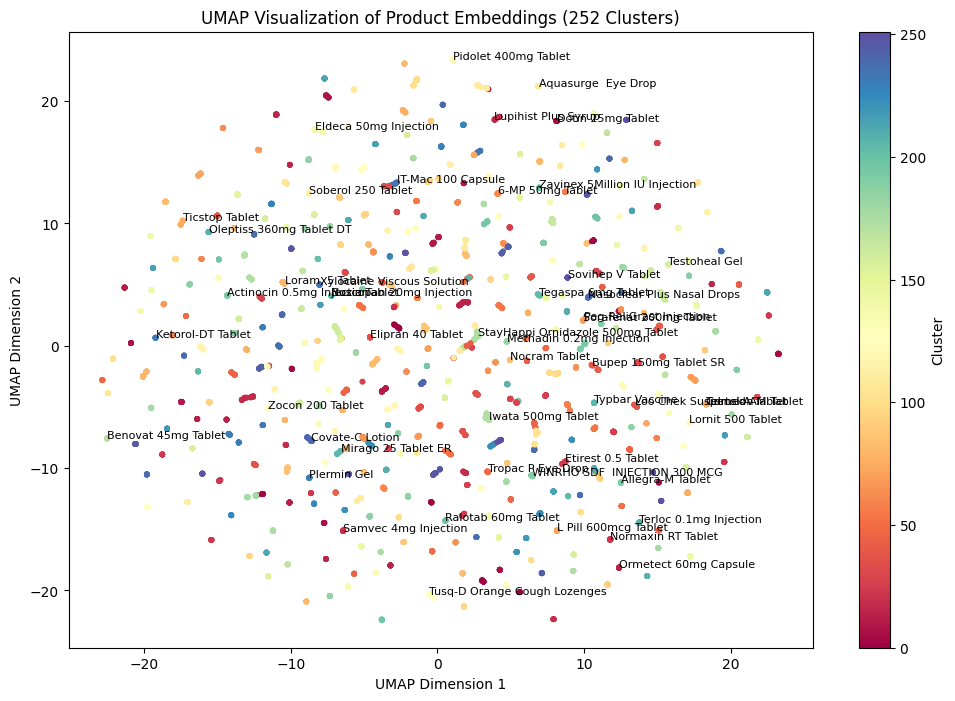

In [168]:
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Assuming reduced_embeddings_df contains the embeddings and product_name
# Example: reduced_embeddings_df has columns like 'embedding_1', 'embedding_2', ..., 'product_name'

# Step 1: Reduce dimensionality with UMAP
reducer = umap.UMAP(n_components=2, random_state=42)  # Reduce to 2D for visualization
umap_embeddings = reducer.fit_transform(reduced_embeddings_df.drop(columns=['product_name']))

# Step 2: Cluster the data into 252 clusters
kmeans = KMeans(n_clusters=252, random_state=42)
clusters = kmeans.fit_predict(reduced_embeddings_df.drop(columns=['product_name']))

# Add UMAP coordinates and cluster labels to the dataframe
reduced_embeddings_df['umap_x'] = umap_embeddings[:, 0]
reduced_embeddings_df['umap_y'] = umap_embeddings[:, 1]
reduced_embeddings_df['cluster'] = clusters

# Step 3: Visualize the clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(reduced_embeddings_df['umap_x'], reduced_embeddings_df['umap_y'], 
                      c=reduced_embeddings_df['cluster'], cmap='Spectral', s=10)

# Annotate with product_name (optional: annotate a subset to avoid clutter)
for i, row in reduced_embeddings_df.sample(n=50).iterrows():  # Annotate 50 random points
    plt.text(row['umap_x'], row['umap_y'], row['product_name'], fontsize=8)

plt.colorbar(scatter, label='Cluster')
plt.title('UMAP Visualization of Product Embeddings (252 Clusters)')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

In [169]:
reduced_embeddings_df.groupby('cluster')

,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,embedding_10,...,embedding_99,embedding_100,UMAP_1,UMAP_2,UMAP_3,Cluster,product_name,umap_x,umap_y,cluster
0,10.036274,4.857159,4.919312,4.927445,4.559135,4.008978,5.052557,4.785752,5.751096,4.779876,...,4.749489,4.845094,20.288187,-10.040723,-2.985636,96,Human Insulatard 40IU/ml Suspension for Injection,-12.726506,5.469811,173
1,10.037538,4.855736,4.922729,4.933810,4.568540,4.035784,5.069067,4.782969,5.748888,4.767462,...,4.756418,4.839328,20.289406,-10.041996,-3.001633,96,Insulin 40IU/ml Injection,-12.726655,5.469906,173
2,10.035549,4.858024,4.917249,4.923316,4.552694,3.993998,5.042967,4.788541,5.751833,4.786504,...,4.744873,4.849177,20.288980,-10.041596,-2.987057,96,Huminsulin N 40IU/ml Injection,-12.748082,5.492037,173
3,10.035037,4.858403,4.916568,4.925983,4.560147,4.014640,5.042614,4.784168,5.752452,4.790474,...,4.749955,4.841455,20.301659,-10.054518,-2.998698,96,Insugen-N 40IU/ml Injection,-12.734404,5.478167,173
4,10.037846,4.855440,4.922264,4.924618,4.547487,3.969861,5.058513,4.791763,5.751022,4.768792,...,4.741843,4.858893,20.284899,-10.037781,-2.661463,96,Insulatard 100IU/ml Flexpen,-12.822984,5.568209,173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,10.038760,4.930073,4.945299,5.089859,4.804024,4.998262,5.041797,5.032389,4.969234,4.440695,...,4.813653,4.774665,-11.245403,3.269353,0.524303,108,K-Pot 150mg Injection,-14.925393,5.551515,133
7465,10.038333,4.939392,4.946365,5.096073,4.803571,4.949853,5.035941,5.005582,4.970286,4.451538,...,4.822218,4.767772,-11.247606,3.272312,0.511077,108,Troykcl 1.5gm Injection,-14.924356,5.550105,133
7466,10.038751,4.929760,4.946440,5.092515,4.806843,5.000423,5.040540,5.024596,4.969220,4.449269,...,4.816646,4.772691,-11.237594,3.260514,0.518689,108,Ricetral 0.3gm Injection,-14.927114,5.552506,133
7467,10.038739,4.929931,4.945116,5.089349,4.803601,4.998095,5.041744,5.033779,4.970129,4.439741,...,4.813203,4.774963,-11.245028,3.268832,0.512232,108,Tuberium 150mg Injection,-14.926929,5.552643,133


In [173]:
# Step 1: Filter reduced_embeddings_df for cluster value 173
cluster_173_df = reduced_embeddings_df[reduced_embeddings_df['cluster'] == 173]

# Step 2: Group no_duplicate_df by 'sub_category' and filter for 'Human Insulin Basal'
human_insulin_basal_df = df_no_duplicates[df_no_duplicates['sub_category'] == 'Human Insulin Basal']

# Step 3: Compare product_name values
# Extract product names from both datasets
cluster_173_products = set(cluster_173_df['product_name'].unique())
human_insulin_basal_products = set(human_insulin_basal_df['product_name'].unique())

# Find common and unique products
common_products = cluster_173_products.intersection(human_insulin_basal_products)
unique_to_cluster_173 = cluster_173_products - human_insulin_basal_products
unique_to_human_insulin_basal = human_insulin_basal_products - cluster_173_products

# Print results
print("Common products in cluster 173 and Human Insulin Basal sub-category:")
print(len(common_products))

print("\nProducts unique to cluster 173:")
print(len(unique_to_cluster_173))

print("\nProducts unique to Human Insulin Basal sub-category:")
print(len(unique_to_human_insulin_basal))

Common products in cluster 173 and Human Insulin Basal sub-category:
29

Products unique to cluster 173:
0

Products unique to Human Insulin Basal sub-category:
0
